✅ This is Code , We Are Using K-Means Clustering




> So What Is K-Means Clustering Algorithms ?     
      **K-Means Clustering is an Unsupervised Machine Learning algorithm, which groups the unlabeled dataset into different clusters. The article aims to explore the fundamentals and working of k mean clustering along with the implementation.**

  
#  Unsupervised Machine Learning
is the process of teaching a computer to use unlabeled, unclassified data and enabling the algorithm to operate on that data without supervision. Without any previous data training, the machine’s job in this case is to organize unsorted data according to parallels, patterns, and variations.








In [140]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib
import matplotlib.cm as cm


In [141]:
model_filename = 'drive/MyDrive/Dataset2/your_model_filename.joblib'

Similarity_Users_Final = joblib.load(model_filename)

In [142]:
Similarity_Users_Final.head()

,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
1,1.0,0.000592,0.070214,0.516196,0.265839,0.34608,0.540215,0.334737,0.041962,-0.000171,...,0.158338,0.480139,0.651735,0.139995,0.436931,0.390675,1.09069,1.393703,0.152265,0.410598
2,0.000592,1.0,-0.000011,-0.000047,0.000179,0.000585,0.002136,0.000313,-0.000019,0.028983,...,0.391775,0.000179,-0.000162,-0.000029,-0.000008,0.008061,0.000086,0.024823,0.000393,0.264532
3,0.070214,-0.000011,1.0,-0.000046,0.00002,-0.000418,-0.000033,0.000019,-0.000017,-0.000018,...,0.000006,-0.000021,0.017177,-0.000027,0.000033,-0.004172,0.004106,0.015269,-0.000015,0.021175
4,0.516196,-0.000047,-0.000046,1.0,0.315915,0.255649,0.260805,0.116419,0.000039,0.033166,...,0.150155,0.369353,1.596355,0.068736,0.102317,0.88533,0.35309,0.47253,0.002325,0.19305
5,0.265839,0.000179,0.00002,0.315915,1.0,1.197325,0.174704,1.300616,-0.000023,0.002595,...,0.017527,1.49726,0.337685,0.724984,0.238566,0.317725,0.361205,0.389136,0.526469,0.083756


In [143]:
# استخدم clip لتحديد القيم العليا (تكون أقل من أو تساوي 1.0) بقيمة 1.0
Similarity_Users_Final_Upper_1 = Similarity_Users_Final.clip(upper=1.0)
Similarity_Users_Final_Upper_1.head()


,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
1,1.0,0.000592,0.070214,0.516196,0.265839,0.34608,0.540215,0.334737,0.041962,-0.000171,...,0.158338,0.480139,0.651735,0.139995,0.436931,0.390675,1.0,1.0,0.152265,0.410598
2,0.000592,1.0,-0.000011,-0.000047,0.000179,0.000585,0.002136,0.000313,-0.000019,0.028983,...,0.391775,0.000179,-0.000162,-0.000029,-0.000008,0.008061,0.000086,0.024823,0.000393,0.264532
3,0.070214,-0.000011,1.0,-0.000046,0.00002,-0.000418,-0.000033,0.000019,-0.000017,-0.000018,...,0.000006,-0.000021,0.017177,-0.000027,0.000033,-0.004172,0.004106,0.015269,-0.000015,0.021175
4,0.516196,-0.000047,-0.000046,1.0,0.315915,0.255649,0.260805,0.116419,0.000039,0.033166,...,0.150155,0.369353,1.0,0.068736,0.102317,0.88533,0.35309,0.47253,0.002325,0.19305
5,0.265839,0.000179,0.00002,0.315915,1.0,1.0,0.174704,1.0,-0.000023,0.002595,...,0.017527,1.0,0.337685,0.724984,0.238566,0.317725,0.361205,0.389136,0.526469,0.083756


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


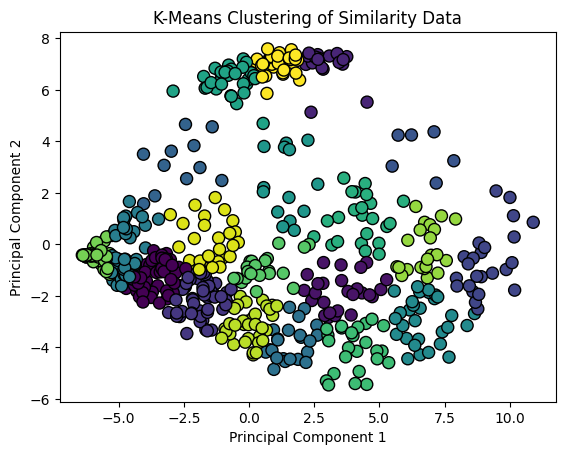

In [144]:

def kmeans_clustering_visualization(similarity_matrix, num_clusters):

    # Use PCA to reduce dimensions
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(similarity_matrix)

    # Using K-Means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(reduced_data)

    return reduced_data, clusters

def plot_clusters(reduced_data, clusters, cluster_spacing=0.1):

    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', edgecolors='k', s=75)
    plt.title('K-Means Clustering of Similarity Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Example Usage:

# Assuming 'Similarity_Users_Final_Upper_1' is your similarity matrix
reduced_data, clusters = kmeans_clustering_visualization(Similarity_Users_Final_Upper_1, num_clusters=20)
plot_clusters(reduced_data, clusters)





In [145]:
print(clusters+1)

[13  1 16 15 12 20  2  3  9  1 12 16  9 12 14 14 10 10 13  4 14  8  4  2
  4 12 19 10  4  4 19 11 11 18  7  9 12 20  2 12 14  6 20  9 17 20  1  1
  1  8 15  8 16 20 16 20  6  3 19 16  4 14  5  5  4 17 18  5 15  1  9 13
 18  1  4 14 18 11 19 18 20 13  8 11 16  2 16 18 16 16  5 16 11  3  8 13
  1  4 12 19  1 20 10 15 14  1 12  1  3  4  4 13  9  1 11 11  3  1  8  9
 20 14 18 15 18 20 16  1  2 12  8 10 20 12 17 12  2 16 18 17 10 20  9  6
 12 16 16  1  1  9  9 18 18  9  1 13 16 16 19 17 16  7 16 19  4 10  2  4
 13 20 11  9 12 20 16 20 10 13  3  1 20 17 19  9  9 15  2 16  4 18  7 12
 18 16  2  1 19 17 17 10 13 13  4 18  9  9 16  1 18  4  8 14  4 16  8 19
 13  9  5  5  2 14  2  1  1 17  8  9  3 13 18 10 10 19  3 16  4 16  5 20
  4 12  7 11 16  8 10  1 10 16  4 16 16 10  9 18 16  1  9  4 18  7 13 19
 11 13 15 15  9  7  9  1 12  5  2 19  9 16 14  4 16 10 19 20  9 17 18  5
 16 15  9 17 16 11  4  1  7 10  9  4 13  7  4  6 10 16 17  2  4  9  9 15
  2  3 16  1 14 14  4 16 20  2  3 16 15 18  1 10  9

In [146]:
from collections import Counter


# Count occurrences of each unique element
element_counts = Counter(clusters)

# Print the counts
for element, count in element_counts.items():
    print(f"The Cluster No.{element+1} Includes : {count} Similar Users")


The Cluster No.13 Includes : 23 Similar Users
The Cluster No.1 Includes : 49 Similar Users
The Cluster No.16 Includes : 71 Similar Users
The Cluster No.15 Includes : 22 Similar Users
The Cluster No.12 Includes : 33 Similar Users
The Cluster No.20 Includes : 35 Similar Users
The Cluster No.2 Includes : 26 Similar Users
The Cluster No.3 Includes : 20 Similar Users
The Cluster No.9 Includes : 60 Similar Users
The Cluster No.14 Includes : 25 Similar Users
The Cluster No.10 Includes : 30 Similar Users
The Cluster No.4 Includes : 52 Similar Users
The Cluster No.8 Includes : 24 Similar Users
The Cluster No.19 Includes : 29 Similar Users
The Cluster No.11 Includes : 14 Similar Users
The Cluster No.18 Includes : 34 Similar Users
The Cluster No.7 Includes : 11 Similar Users
The Cluster No.6 Includes : 6 Similar Users
The Cluster No.17 Includes : 22 Similar Users
The Cluster No.5 Includes : 24 Similar Users
